## Ejercicio 5
Para los datos de 'Coactivation_matrix.mat', filtre la matriz para que, para cada nodo, se mantenga aquel nodo con mayor comunicación, con el nuevo arreglo muestre los nodos y vértices del grafo

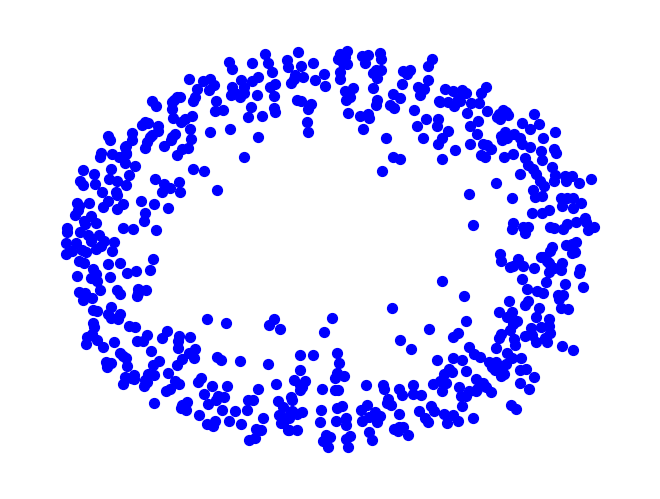

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import scipy.io
from matplotlib import cm  

path = r"C:\Users\gia19\OneDrive\Documentos\RepositorioCacahuate\Parcial 2\Coactivation_matrix.mat"

mat_json =scipy.io.loadmat(path)

mat_dict = {k: v for k, v in mat_json.items() if k[0] != '_'}
df = pd.DataFrame(mat_dict['Coactivation_matrix'])
#Adj matrix en NetworkX
G = nx.from_pandas_adjacency(df, create_using=nx.DiGraph)

#Dejar a cada nodo con su nodo de mayor peso)

for node in G.nodes():
    edges = G[node]
    if edges:
        vecinoMax = max(edges.items(), key=lambda x: x[1]['weight'])[0]
        for vecinos in list(edges.keys()):
            if vecinos != vecinoMax:
                G.remove_edge(node, vecinos)
#Plot sin chords lol

nx.draw(G, node_color='blue', edge_color='white', node_size=50)

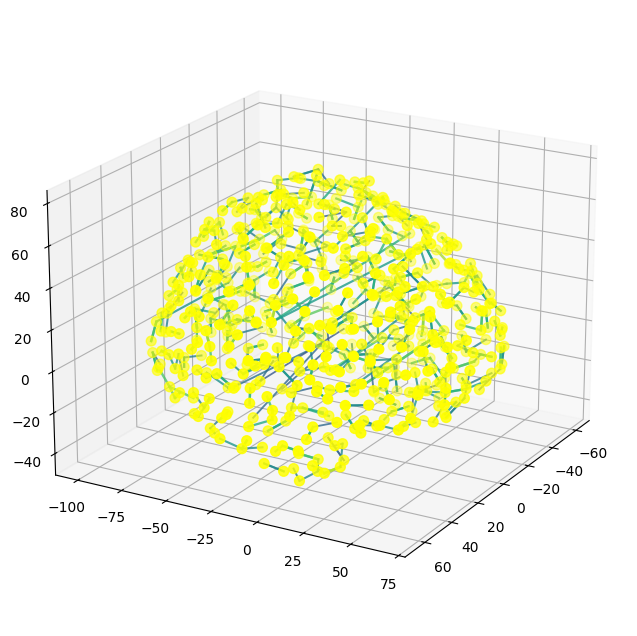

In [3]:
df_adj = nx.to_pandas_adjacency(G)
adj_matrix = df_adj.to_numpy()

x = mat_dict['Coord'][:, 0]
y = mat_dict['Coord'][:, 1]
z = mat_dict['Coord'][:, 2]
#Sin esto no se plotea chido 

pesoMaximo = np.max(adj_matrix) if np.max(adj_matrix) > 0 else 1  #Evita división sobre '
pesosNormalizados = adj_matrix / pesoMaximo  #Pesos sólo del 0 al 1
colormap = cm.viridis  #Colormap
#Figure
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

#Plot nodes
ax.scatter3D(x, y, z, color='yellow', s=50)

#Plot edges
for i in range(len(adj_matrix)):
    for j in range(len(adj_matrix)):
        weight = adj_matrix[i, j]
        if weight > 0:  #Sólo non zero edges
            color = colormap(pesosNormalizados[i, j])  #Color segun el peso
            ax.plot(
                [x[i], x[j]],
                [y[i], y[j]],
                [z[i], z[j]],
                color=color, alpha=0.8, lw=1 + 3 * weight  
            )

#Vista
ax.view_init(elev=20., azim=30)

plt.show()
